# Homework 1
## BUSN 41204

##### Group:
- Aman Krishna
- Christian Pavilanis
- Jingwen Li
- Yazmin Ramirez Delgado

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import plotnine as p9
import warnings
pd.set_option("display.precision", 4)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

import os
import datetime

# 1
### Question 1

For each one the ten statements below say whether they are true or not and explain why.

1. As one increases k, the number of nearest neighbor, in a kNN classifier,
   
    (a) the bias of the classifier will increase;\
        R. TRUE. The bias of the classifier will increase because the classifier will be more sensitive to the noise in the data.\
    (b) the variance of the classifier will increase;\
        R. FALSE. The variance of the classifier will decrease as k increases since we are reducing the grades of freedom of the classifier.\
    (c) the misclassification rate on the training dataset will increase;\
        R. FALSE. 
    (d) the misclassification rate on a test dataset will increase

R. 

# Question 3
In this question, you will explore prices of used cars as a function of different input variables. Download the file UsedCars.csv from Canvas.

1. Take a look at the data-set and describe for what kind of business related problems you could use this data. That is, why would anyone care to collect this data?
   
   R. This data could be used to predict the price of a used car based on the other variables. This could be useful for a car dealership to determine the price of a used car they are selling. It could also be useful for a consumer to determine the price of a used car they are buying.

In [4]:
used_cars = pd.read_csv('UsedCars.csv')
used_cars.head()

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296.0000,1995,Black,3.2000,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948.0000,1995,other,3.2000,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428.0000,1997,White,3.2000,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622.0000,1999,Silver,4.2000,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673.0000,1999,Silver,4.2000,Gasoline,SoA,unsp,Alloy


2. Using ordinary linear regression, find a relationship between price and mileage of the form
   
   $ price = b0 + b1 × mileage + e $
   
   using the training data. Create a scatter plot of price vs mileage. Include the best linear regression fit onto the plot.

In [9]:
# Use OLS to find relationship between price and mileage
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model including and intercept
model = ols('price ~ mileage', data=used_cars).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 3.438e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:35:00   Log-Likelihood:            -2.1535e+05
No. Observations:               20063   AIC:                         4.307e+05
Df Residuals:                   20061   BIC:                         4.307e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.542e+04    154.429    358.866      0.0

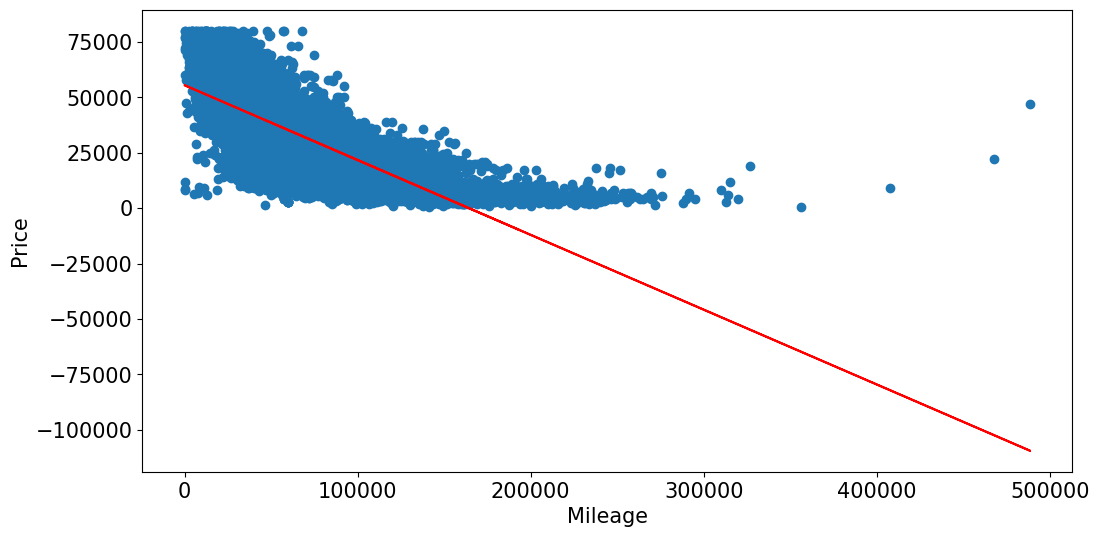

In [10]:
# Create a scatter plot of price vs mileage and plot the regression calculated above
plt.scatter(used_cars['mileage'], used_cars['price'])
plt.plot(used_cars['mileage'], model.predict(), color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

You might notice that the linear fit does not capture the true relationship well. Use k-NN and regression trees to find the relationship between price and mileage.

In [ ]:
# Let's calculate KNN regression for k=1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(used_cars[['mileage']], used_cars['price'], test_size=0.2, random_state=42)

# Create a list of k values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# Create a list to store the RMSE values for each k
rmse_values = []
